# Online Payment Fraud Detection


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis
To begin, we will import the necessary libraries for basic data manipulation and analysis.

In [58]:
import pandas as pd  # For data manipulation
import numpy as np  # For basic data analysis
from matplotlib import pyplot as plt  # For basic data visualization
import seaborn as sns # For more advanced visualizations


data = pd.read_csv('/content/drive/MyDrive/Asan Innovators/OnlinePaymentFraudDetection/PaymentTransactions.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            3000 non-null   int64  
 1   type            3000 non-null   object 
 2   amount          3000 non-null   float64
 3   nameOrig        3000 non-null   object 
 4   oldbalanceOrg   3000 non-null   float64
 5   newbalanceOrig  3000 non-null   float64
 6   nameDest        3000 non-null   object 
 7   oldbalanceDest  3000 non-null   float64
 8   newbalanceDest  3000 non-null   float64
 9   isFraud         3000 non-null   int64  
 10  isFlaggedFraud  3000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 257.9+ KB


In [60]:
data.drop('step',axis =1, inplace = True)

We can see that the 'isFraud' column will be our target variable with '1' representing cases of fraud and '0' representing non-fraud cases.  At first glance, the columns which appear may be useful in training our model are:

- type
- amount
- oldbalanceOrg
- newbalanceOrig
- oldbalanceDest
- newbalanceDest

The 'step' column contains an integer representing the number of hours passed since the recording of the dataset began.  This may be useful in a time-series analysis but not for the classfication model we will be constructing so it will be omitted.

The 'nameOrig' and 'nameDest' columns contain unique identifiers which may provide additional insight with proper transformation considered beyond the scope of this project, so they will be omitted for now.

Of the remaining columns, we have one categorical variable, 'type', and five numeric variables representing dollar amounts.  We should now inspect these values to determine what, if any, transformation might be necessary.  We will assign these column names to their own variable for ease of reference.

In [61]:
# Creating a new variable containing numeric column names
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Printing statistical summaries of these numeric columns in our dataset
data[num_columns].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,6.720826e+05,1.063646e+06,4.618084e+05,5.573977e+05,1.085688e+06
std,1.564805e+06,2.192988e+06,1.617139e+06,1.874900e+06,2.825818e+06
min,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.131000e+03,1.111750e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.126685e+05,9.997600e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.726925e+05,8.919445e+05,1.012633e+04,2.807906e+05,8.871655e+05
max,1.000000e+07,1.988782e+07,1.024625e+07,3.296166e+07,3.464570e+07


In [62]:
# Checking how many missing values each column contains
data.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [63]:
data.type.value_counts()

CASH_OUT    1019
TRANSFER     917
PAYMENT      711
CASH_IN      261
DEBIT         92
Name: type, dtype: int64

In [64]:
data.nameOrig.value_counts()

C1231006815    1
C1518273469    1
C1345605199    1
C341811151     1
C373557981     1
              ..
C903268937     1
C1193841543    1
C315461968     1
C255941269     1
C262815390     1
Name: nameOrig, Length: 3000, dtype: int64

In [65]:
data.type.value_counts()

CASH_OUT    1019
TRANSFER     917
PAYMENT      711
CASH_IN      261
DEBIT         92
Name: type, dtype: int64

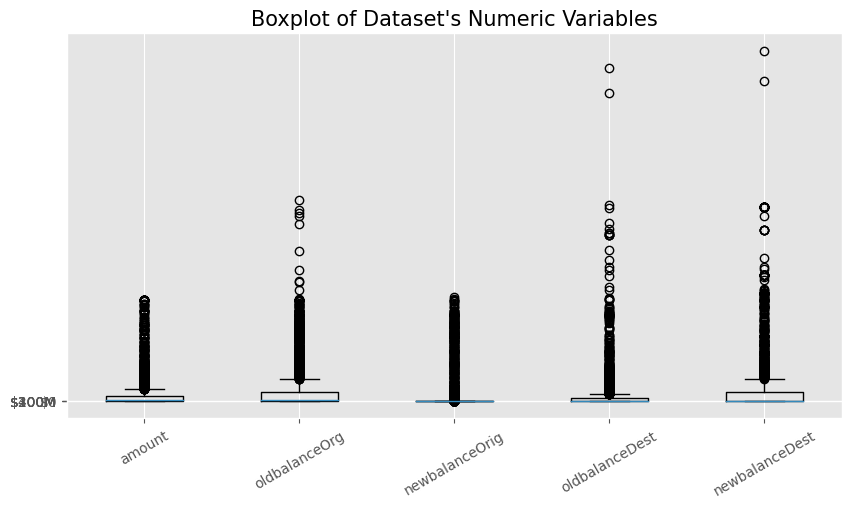

In [66]:
fig, ax = plt.subplots(figsize=(10,5))  # Assigning axes variable and resizing plot
plt.boxplot(x=data[num_columns])  # Creating the boxplot
ax.set_xticklabels(num_columns, rotation=30)  # Relabeling the x-axis
ax.set_yticks(range(0,50000,10000))  # Changing the y-axis tick mark distribution
ax.set_yticklabels(['$0', '$100M', '$200M', '$300M', '$400M'])  # Relabeling the y-axis
plt.title('Boxplot of Dataset\'s Numeric Variables', fontsize=15)  # Adding a title to the plot
plt.style.use('ggplot')  # Selecting a plot style to include gridlines
plt.show()  # Displaying the plot

From the checks above, we can conclude the following about the numeric columns to be used in our model:

- They have values ranging from zero to the hundreds of millions
- They have no null values we need to address
- They each have many outliers

This means that we should normalize these columns, are able to do so now without additional grooming, and should use z-score normalization due to the presence of outliers.

## Data Preparation
We'll now make modifications to our dataset to groom it into a format useable by our machine learning model.

In [67]:
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
3,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
4,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
3,3,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
4,3,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [69]:
data.drop(['nameDest','nameOrig'],axis =1,inplace = True)

In [70]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,3,11668.14,41554.0,29885.86,0.0,0.0,0,0
3,3,7817.71,53860.0,46042.29,0.0,0.0,0,0
4,3,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'data'

# Splitting the data into features (X) and target variable (y)
X = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = data['isFraud']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model:", accuracy)


Accuracy of Logistic Regression model: 0.9366666666666666


### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Training the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

Accuracy of Decision Tree Classifier: 0.9766666666666667


### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training the Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier:", accuracy_rf)

Accuracy of Random Forest Classifier: 0.9916666666666667


### Naive Baye's

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Training the Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Calculating accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes Classifier:", accuracy_nb)

Accuracy of Naive Bayes Classifier: 0.71


### XGBoost

In [77]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier instance
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost Classifier:", accuracy_xgb)

Accuracy of XGBoost Classifier: 0.99


In [78]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test, y_pred_xgb)

# Print the classification report
print("Classification Report for XGBoost Classifier:")
print(report)

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       313
           1       0.99      0.99      0.99       287

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



### KNN Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier instance (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN Classifier:", accuracy_knn)


Accuracy of KNN Classifier: 0.9583333333333334


### Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting Classifier instance
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model on the training data
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting Classifier:", accuracy_gb)


Accuracy of Gradient Boosting Classifier: 0.9883333333333333


### Support Vector Machine

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM classifier:", accuracy_svm)


### MLPClassifier

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create an MLP classifier instance
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

# Train the MLP model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of MLP Classifier:", accuracy_mlp)


Accuracy of MLP Classifier: 0.94


In [82]:
result_df = X_test.copy()  # Make a copy of X_test
result_df['Predicted'] = y_pred_gb  # Add the predicted values as a new column



In [83]:
result_df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Predicted
1801,4,494244.61,494244.61,0.00,0.00,0.00,1
1190,4,373185.07,0.00,0.00,430989.20,1178808.14,0
1817,4,122235.11,122235.11,0.00,0.00,0.00,1
251,3,1239.06,396386.00,395146.94,0.00,0.00,0
2505,1,8380.79,8380.79,0.00,0.00,8380.79,1
1117,1,151096.79,0.00,0.00,463533.54,60738.03,0
1411,3,2786.60,29009.51,26222.91,0.00,0.00,0
2113,1,1631640.02,1631640.02,0.00,705298.87,2336938.89,1
408,0,106847.36,4710982.07,4817829.42,335711.51,52415.15,0
2579,1,134515.36,134515.36,0.00,29488.06,164003.41,1


### Prediction of the Online Payment


In [85]:
from IPython.display import Audio, display, HTML
import pandas as pd
import numpy as np

# Types
'''
1    CASH_OUT
4    TRANSFER
3    PAYMENT
0    CASH_IN
2    DEBIT
'''

# Payment Details Input Form
input_data = {
    'type': 1,
    'amount': 134515.36,          # in thousands
    'oldbalanceOrg': 0,   # in lakhs
    'newbalanceOrig': 0.06,       # in lakhs
    'oldbalanceDest': 29488.06,   # in thousands
    'newbalanceDest': 12.41   # in thousands
}

account_number = '1114442255'
reciever_name = 'AAAA'
reciever_location = 'Location1'

# Convert input data to DataFrame
input_df = pd.DataFrame([input_data])

# Make predictions for the input data
prediction = knn_model.predict(input_df)

# Define the colors for the messages
fraud_color = 'red'
genuine_color = 'green'

# Play alert sound if prediction is fraud
if prediction[0] == 1:
    display(Audio('/content/drive/MyDrive/Asan Innovators/OnlinePaymentFraudDetection/alert.mp3', autoplay=True))
    message = "<h3><font color='{}'>!!! High Alert, Fraud Account Details...!!!</font></h3>".format(fraud_color)
    message += "<p><strong>Account Number:</strong> {}</p>".format(account_number)
    message += "<p><strong>Reciever Name:</strong> {}</p>".format(reciever_name)
    message += "<p><strong>Reciever Location:</strong> {}</p>".format(reciever_location)
    message += "<p><font color='{}'>The payment is predicted to be fraudulent.</font></p>".format(fraud_color)
else:
    message = "<h3><font color='{}'>Payment Is Genuine</font></h3>".format(genuine_color)


# Display the message using HTML
HTML(message)
